<a href="https://colab.research.google.com/github/castudil/Machine-Learning/blob/main/S07-Linear-Models/Tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

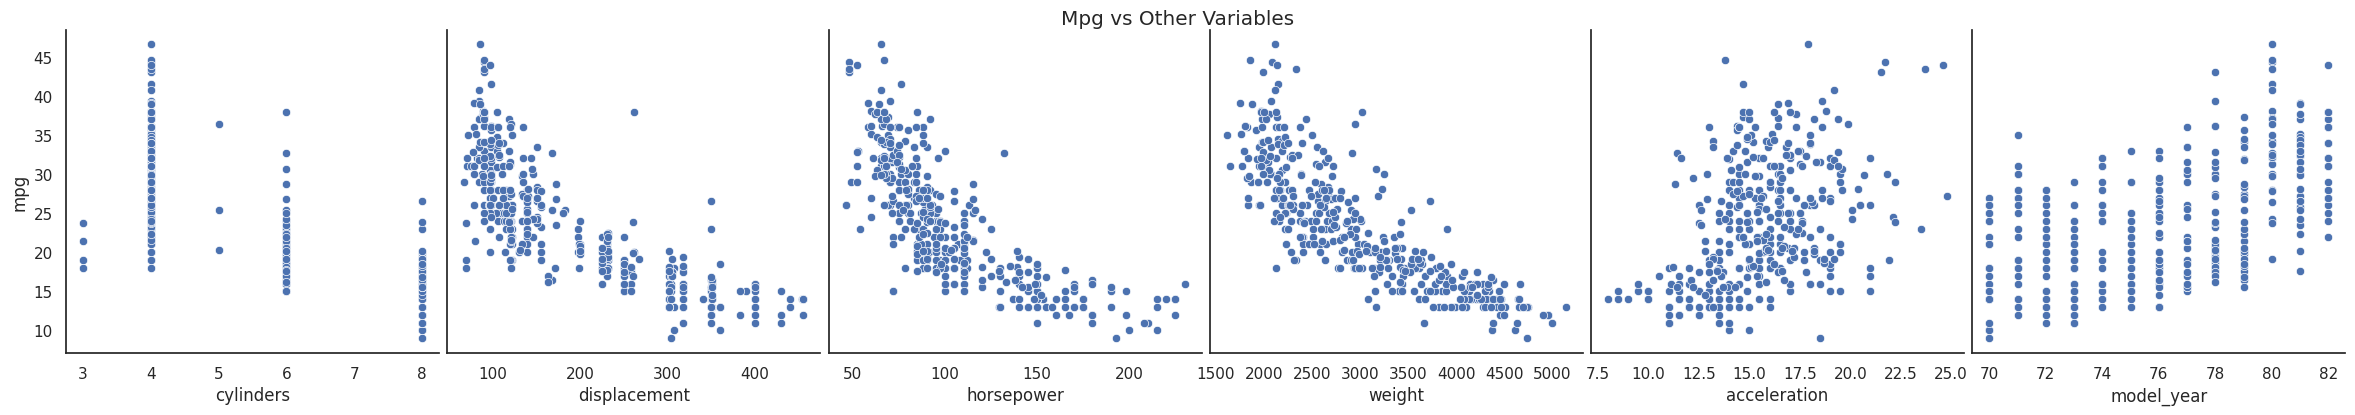

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

numeric_columns = mpg.drop(columns=['name', 'origin']).dropna()
sns.pairplot(numeric_columns, y_vars=['mpg'], x_vars=numeric_columns.columns.drop('mpg'), height=4, aspect=1)
plt.suptitle('Mpg vs Other Variables', y=1.02)
plt.show() 


Se utiliza un gráfico de dispersión múltiple para observar la relación entre la mpg y las demás variables numéricas. Este tipo de visualización permite detectar tendencias agrupaciones que pueden influir en el rendimiento del modelo de regresión.

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

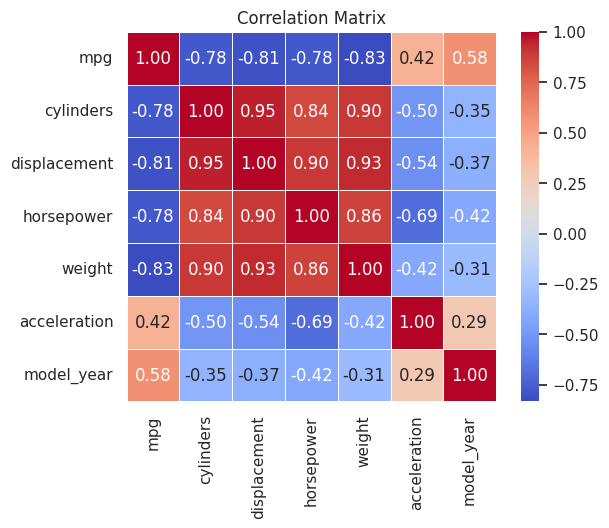

In [43]:
corr_matrix = numeric_columns.corr()
plt.Figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,linewidths=.5 )
plt.title('Correlation Matrix')
plt.show()

La matriz de correlación permite analizar de forma cuantitativa qué tan relacionadas están las variables numéricas entre sí. Los valores cercanos a 1 o -1 indican una relación lineal fuerte, mientras que valores cercanos a 0 sugieren una relación débil o inexistente.

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Variables to make de prediction
X = numeric_columns.drop(columns=['mpg'])
# objective
y = numeric_columns['mpg']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [45]:
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

coef_df = pd.DataFrame({'Variable': X.columns, 'Weight': model.coef_})
print(coef_df)

print(f"\nMean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

       Variable    Weight
0     cylinders -0.116173
1  displacement  0.001013
2    horsepower -0.002276
3        weight -0.006561
4  acceleration  0.061736
5    model_year  0.760636

Mean Squared Error: 10.502370329417325
R^2 Score: 0.7942349075428586


Se calculan dos métricas clave:

MSE: mide el error promedio al predecir mpg, penalizando errores grandes.

R² Score: indica qué porcentaje de la variabilidad de mpg es explicada por el modelo. Un valor cercano a 1 implica un buen ajuste.

5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


In [46]:
def plotWithLine(x,y,data, top_value):
    print(f"Related variables {x}, {y} (r = {top_value:.2f})")
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x, y=y, data=data, line_kws={'color': 'red'})
    plt.title(f'linear regression between {y} and {x}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Related variables weight, mpg (r = 0.83)


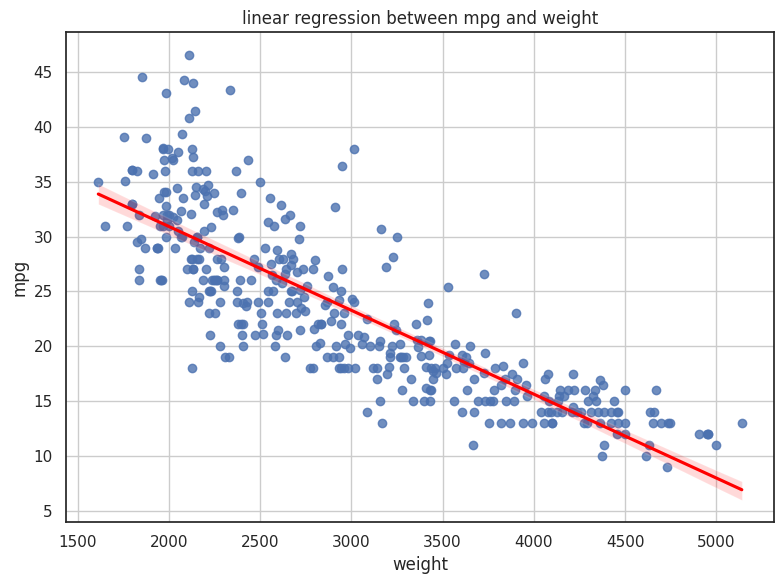

Related variables cylinders, displacement (r = 0.95)


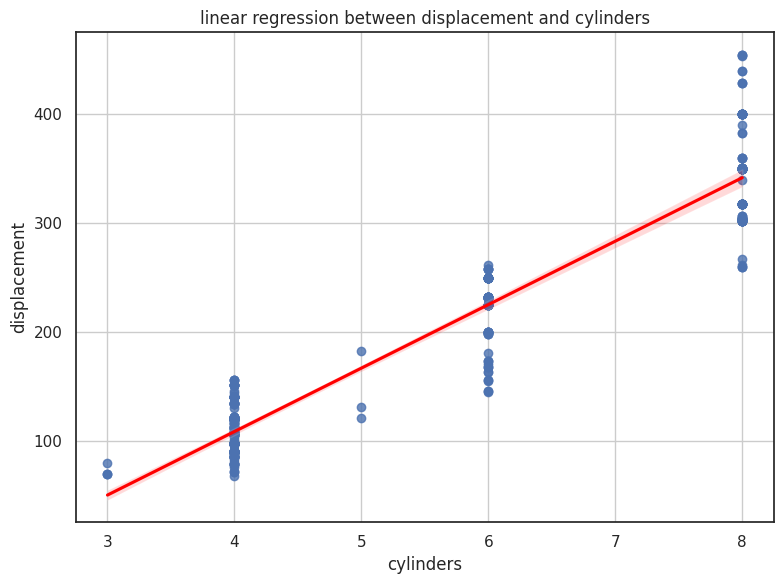

In [47]:
# Highest correlated variable with mpg
top_corr = corr_matrix['mpg'].drop('mpg').abs().sort_values(ascending=False)
top_variable = top_corr.idxmax()
top_value = top_corr.max()
plotWithLine(top_variable, 'mpg', numeric_columns, top_value)


# Highest correlated variable in general
upper = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape, dtype=bool)))
max_corr_pair = upper.stack().abs().sort_values(ascending=False).idxmax()
x, y = max_corr_pair
r = corr_matrix.loc[x, y]
plotWithLine(x, y, numeric_columns, r)


Aquí se identifica cuál es la variable más fuertemente relacionada con mpg. Se genera un gráfico de dispersión con línea de regresión, para visualizar gráficamente esta dependencia.
Además del enfoque anterior, se analiza toda la matriz para encontrar el par de variables más correlacionadas entre sí, sin limitarse a mpg. Esta comparación revela variables relacionadas fuertemente, estas relaciones son utiles para entrenar modelos de predicción.